### 이미지 데이터의 다중 분류 (Multi-class Classification)

In [6]:
# 데이터 준비
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


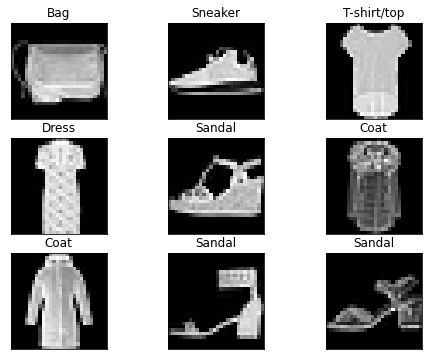

In [7]:
# 데이터 이미지 확인
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

samples = np.random.randint(len(X_train), size=9)

plt.figure(figsize=(8,6))

for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap='gray')
  plt.title(class_names[y_train[idx]])

plt.show()

In [8]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state=42
)

print(X_train.shape, y_train.shape) # shape을 보는게 중요하다 ->  나중에 Dense를 쌓을 때 유용하게 알 수 있음
print(X_val.shape, y_val.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [9]:
# 데이터 정규화
import numpy as np

X_train = X_train.astype('float32') / 255. # gray scale로 잘라준다.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(np.max(X_train), np.min(X_train))

1.0 0.0


In [10]:
# shape 변경 / 변경 확인
X_train = (X_train.reshape((-1, 28 * 28)))
X_val = (X_val.reshape((-1, 28 * 28)))
X_test = (X_test.reshape((-1, 28 * 28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 784) (42000,)
(18000, 784) (18000,)
(10000, 784) (10000,)


In [11]:
# 원 핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [12]:
# 모델
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  
  model.add(layers.Flatten(input_shape=(784,)))
  model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 컴파일
import tensorflow as tf

adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['acc'])

In [15]:
# 학습
EPOCHS =100
BATCH_SIZE = 64

history = model.fit(X_train, y_train_oh,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val_oh),
                    verbose=1)

Epoch 1/100
657/657 [==============================] - 5s 4ms/step - loss: 0.6052 - acc: 0.7886 - val_loss: 0.4495 - val_acc: 0.8418
Epoch 2/100
657/657 [==============================] - 2s 3ms/step - loss: 0.4296 - acc: 0.8476 - val_loss: 0.4094 - val_acc: 0.8550
Epoch 3/100
657/657 [==============================] - 2s 4ms/step - loss: 0.3893 - acc: 0.8600 - val_loss: 0.3840 - val_acc: 0.8640
Epoch 4/100
657/657 [==============================] - 2s 4ms/step - loss: 0.3626 - acc: 0.8684 - val_loss: 0.3612 - val_acc: 0.8733
Epoch 5/100
657/657 [==============================] - 2s 4ms/step - loss: 0.3463 - acc: 0.8730 - val_loss: 0.3589 - val_acc: 0.8721
Epoch 6/100
657/657 [==============================] - 2s 3ms/step - loss: 0.3275 - acc: 0.8808 - val_loss: 0.3526 - val_acc: 0.8743
Epoch 7/100
657/657 [==============================] - 2s 3ms/step - loss: 0.3115 - acc: 0.8865 - val_loss: 0.3647 - val_acc: 0.8699
Epoch 8/100
657/657 [==============================] - 2s 4ms/step - 

In [16]:
# 학습 곡선
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch

 plt.figure(figsize=(16,8))
 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Mean Abs Error [MPG]')
 plt.plot(hist['epoch'], hist['loss'], label='Train Error')
 plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
 plt.ylim([0,5])
 plt.legend()
 
 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Mean Square Error [$MPG^2$]')
 plt.plot(hist['epoch'], hist['acc'], label='Train Error')
 plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Error')
 plt.ylim([0,20])
 plt.legend()
 plt.show()

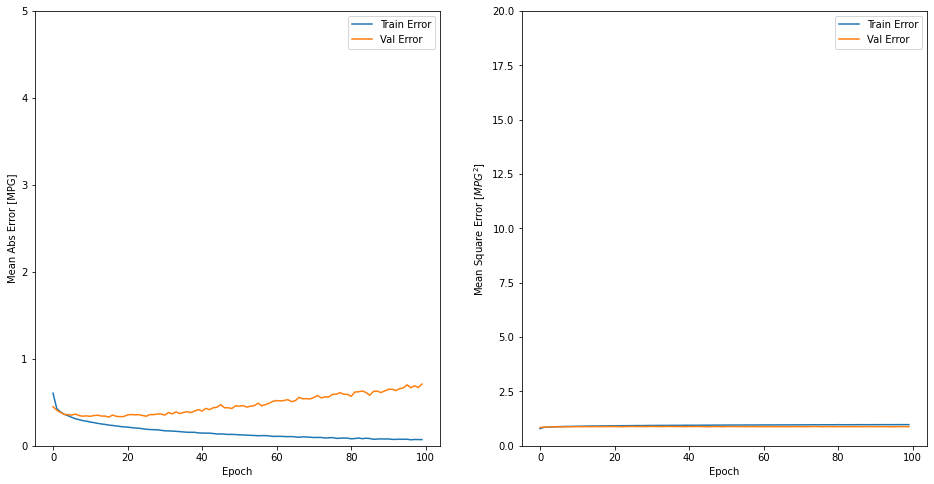

In [17]:
plot_history(history)

In [18]:
# 예측
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 0s 1ms/step


array([[3.3844504e-32, 1.1619395e-20, 9.4194861e-19, 3.3737392e-24,
        1.3127755e-24, 2.0750781e-09, 5.6785598e-31, 9.1316590e-09,
        8.0217035e-20, 1.0000000e+00]], dtype=float32)

In [19]:
# 가장 확률이 높은 곳의 인덱스를 추출한다.
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [20]:
X_test.shape

(10000, 784)

<Figure size 1152x432 with 0 Axes>

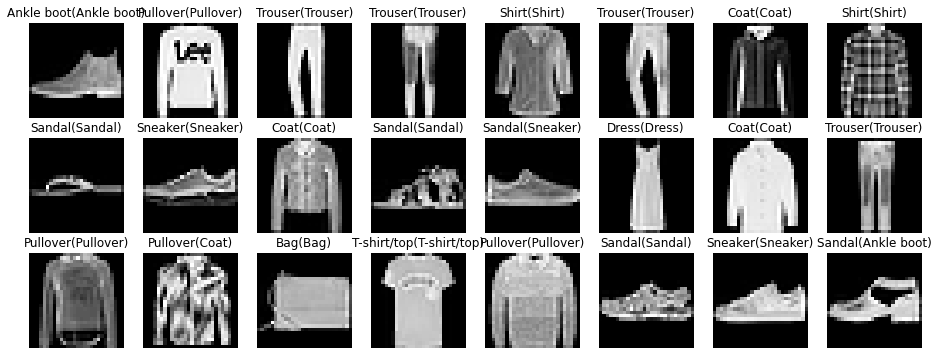

In [21]:
# 예측 결과의 이미지 표시
n_rows = 3
n_cols = 8

plt.figure(figsize=(n_cols * 2, n_rows * 2))
plt.figure(figsize=(n_cols * 2, n_rows * 2))

for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

plt.show()

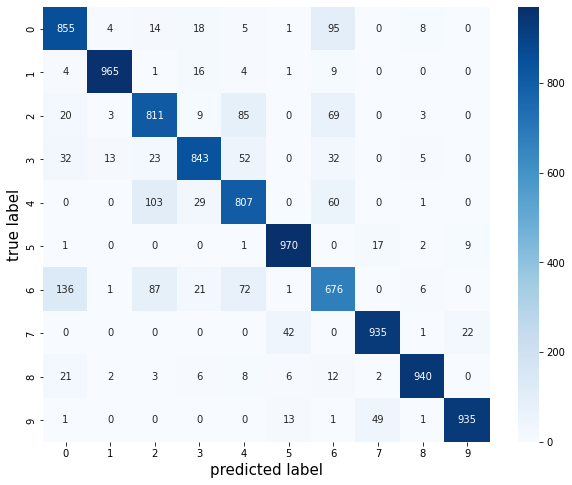

In [22]:
# 혼동행렬 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_matrix(y_test, y_pred):
  plt.figure(figsize = (10, 8))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
  plt.xlabel('predicted label', fontsize = 15)
  plt.ylabel('true label', fontsize = 15)
  plt.show()
  
plot_matrix(y_test, y_pred_argmax) 

### 합성곱 신경망 CNN
흑백 이미지의 분류
- 입력과 가까운 layer는 convolution을 사용한다.
- 출력과 가까운 layer는 softmax를 사용한다.

In [23]:
# 데이터 준비
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


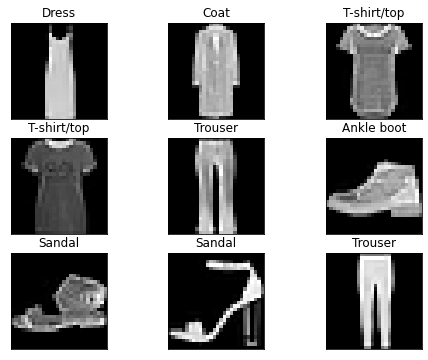

In [24]:
# 데이터 이미지 확인
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

samples = np.random.randint(len(X_train), size=9)

plt.figure(figsize=(8,6))

for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap='gray')
  plt.title(class_names[y_train[idx]])

plt.show()

In [25]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state=42
)

print(X_train.shape, y_train.shape) # shape을 보는게 중요하다 ->  나중에 Dense를 쌓을 때 유용하게 알 수 있음
print(X_val.shape, y_val.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [26]:
# 이미지 데이터의 정규화
import numpy as np

X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(np.max(X_train), np.min(X_train))

1.0 0.0


In [27]:
# 데이터 shape 확인
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (42000, 28, 28)
X_val :  (18000, 28, 28)
X_test :  (10000, 28, 28)


In [28]:
# 채널 축 추가
import tensorflow as tf

X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis] # 축을 하나 씩 추가했더니 28, 28, 1이 추가됨 1차원 배열을 2차원 배열로 묶어줌

print('X_train:', X_train.shape)
print('X_val:', X_val.shape)
print('X_test:', X_test.shape)

X_train: (42000, 28, 28, 1)
X_val: (18000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [29]:
# 모델 만들기
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(filters=16, kernel_size=3,
                          strides=(1,1), padding='same', activation='relu',
                          input_shape=(28,28, 1)))
  model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
  model.add(layers.Conv2D(filters=32, kernel_size=3,
                          strides=(1,1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
  model.add(layers.Conv2D(filters=64, kernel_size=3,
                          strides=(1,1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model

In [30]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)        

In [31]:
# 모델의 컴파일
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['acc'])

In [32]:
EPOCHS=30
BATCH_SIZE=64
history=model.fit(X_train, y_train_oh,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(X_val, y_val_oh),
                  verbose=1)

Epoch 1/30
657/657 [==============================] - 10s 5ms/step - loss: 0.5904 - acc: 0.7844 - val_loss: 0.4130 - val_acc: 0.8476
Epoch 2/30
657/657 [==============================] - 4s 6ms/step - loss: 0.3684 - acc: 0.8678 - val_loss: 0.3367 - val_acc: 0.8787
Epoch 3/30
657/657 [==============================] - 3s 5ms/step - loss: 0.3140 - acc: 0.8860 - val_loss: 0.3120 - val_acc: 0.8858
Epoch 4/30
657/657 [==============================] - 3s 5ms/step - loss: 0.2853 - acc: 0.8952 - val_loss: 0.2753 - val_acc: 0.9026
Epoch 5/30
657/657 [==============================] - 3s 5ms/step - loss: 0.2598 - acc: 0.9063 - val_loss: 0.3089 - val_acc: 0.8898
Epoch 6/30
657/657 [==============================] - 4s 6ms/step - loss: 0.2426 - acc: 0.9118 - val_loss: 0.2520 - val_acc: 0.9073
Epoch 7/30
657/657 [==============================] - 3s 5ms/step - loss: 0.2269 - acc: 0.9170 - val_loss: 0.2615 - val_acc: 0.9041
Epoch 8/30
657/657 [==============================] - 3s 5ms/step - loss: 0

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch
 plt.figure(figsize=(16,8))
 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
 plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
 plt.legend()
 
 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
 plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
 plt.legend()
 plt.show()

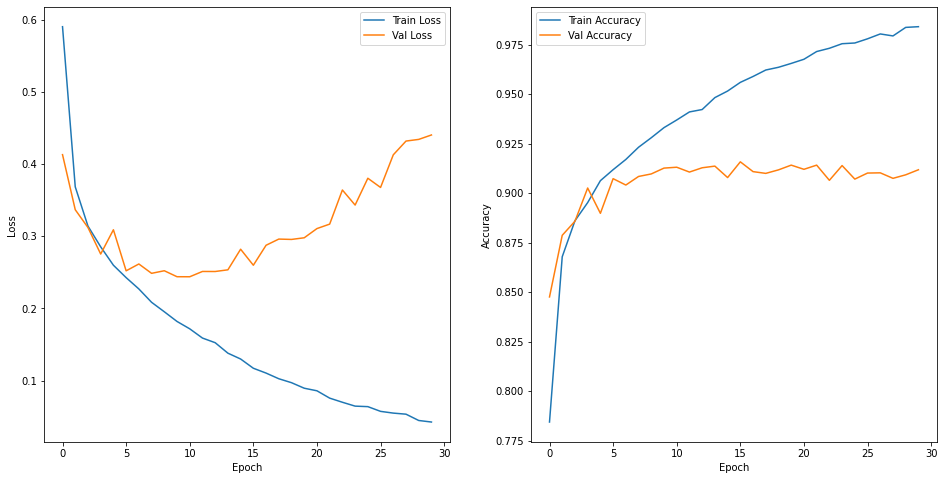

In [34]:
plot_history(history)

In [35]:
# 드랍 아웃 - 오버피팅(overfitting)을 수정하기 위해서 dropout 레이어를 추가한 모델을 학습 시킨다.
# input의 outcome이 다음 input으로 들어가는데 이때 20%를 버리고 들어간다.
# 일반적으로 대부분의 CNN 모델에서 DropOut을 사용한다.
from tensorflow import keras
from tensorflow.keras import layers

def build_dropout_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=16, kernel_size= 3, 
            strides=(1, 1), padding='same', activation='relu', 
            input_shape=(28, 28, 1)))
  model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(filters=32, kernel_size= 3, 
            strides=(1, 1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(filters=64, kernel_size= 3, 
            strides=(1, 1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(layers.Dropout(0.2))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(10, activation = 'softmax'))

  return model

In [36]:
model = build_dropout_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [37]:
# 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [38]:
EPOCHS = 30
BATCH_SIZE = 64
history = model.fit(X_train, y_train_oh, 
                    epochs = EPOCHS, 
                    batch_size = BATCH_SIZE, 
                    validation_data = (X_val, y_val_oh),
                    verbose = 1)

Epoch 1/30
657/657 [==============================] - 5s 6ms/step - loss: 0.7130 - acc: 0.7347 - val_loss: 0.4421 - val_acc: 0.8422
Epoch 2/30
657/657 [==============================] - 3s 5ms/step - loss: 0.4490 - acc: 0.8337 - val_loss: 0.3650 - val_acc: 0.8682
Epoch 3/30
657/657 [==============================] - 4s 6ms/step - loss: 0.3923 - acc: 0.8549 - val_loss: 0.3398 - val_acc: 0.8754
Epoch 4/30
657/657 [==============================] - 3s 5ms/step - loss: 0.3622 - acc: 0.8667 - val_loss: 0.3176 - val_acc: 0.8854
Epoch 5/30
657/657 [==============================] - 4s 6ms/step - loss: 0.3380 - acc: 0.8734 - val_loss: 0.3002 - val_acc: 0.8893
Epoch 6/30
657/657 [==============================] - 4s 6ms/step - loss: 0.3216 - acc: 0.8796 - val_loss: 0.2861 - val_acc: 0.8968
Epoch 7/30
657/657 [==============================] - 3s 5ms/step - loss: 0.3088 - acc: 0.8844 - val_loss: 0.2726 - val_acc: 0.9009
Epoch 8/30
657/657 [==============================] - 3s 5ms/step - loss: 0.

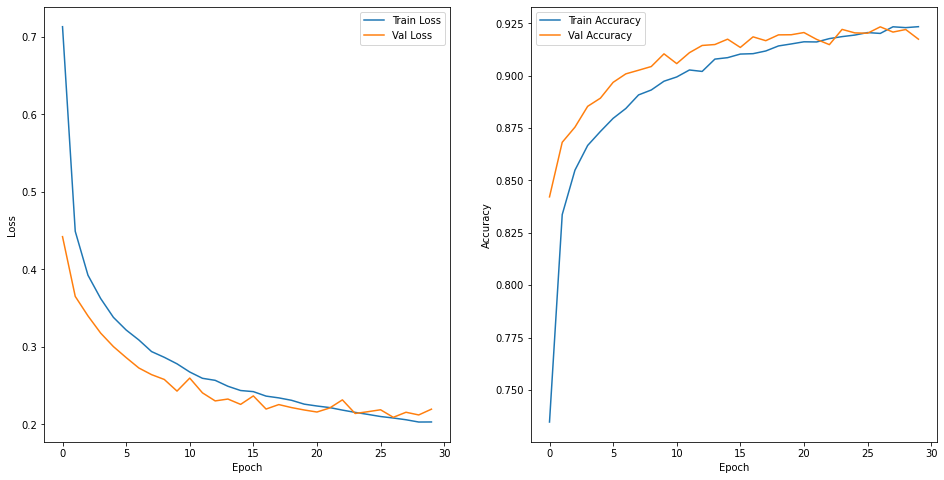

In [39]:
plot_history(history)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
  print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
  print('precision: %.3f' % (precision_score(y_test, y_pred, 
  average='macro')))
  print('recall_score: %.3f' % (recall_score(y_test, y_pred, 
  average='macro')))
  print('f1_score: %.3f' % (f1_score(y_test, y_pred, 
  average='macro')))

In [41]:
print_score(y_test, y_pred_argmax)

accuracy: 0.874
precision: 0.875
recall_score: 0.874
f1_score: 0.874


### 컬러 이미지의 분류

In [1]:
# 데이터 준비
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


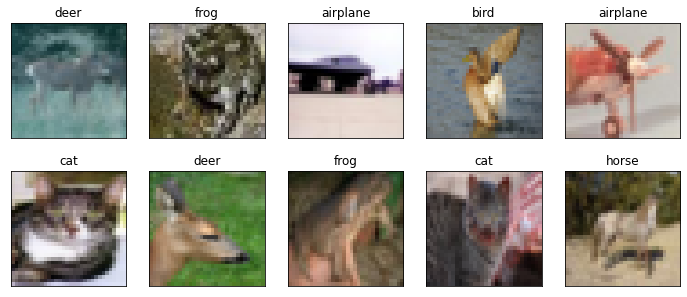

In [2]:
# 데이터 표시
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
 'dog', 'frog', 'horse', 'ship', 'truck']

samples = np.random.randint(len(X_train), size=10)

plt.figure(figsize=(12, 5))

for i, idx in enumerate(samples):
  plt.subplot(2, 5, i+1, xticks=[], yticks=[])
  plt.title((class_names[y_train[idx][0]]))
  plt.imshow(X_train[idx])
plt.show()

In [3]:
# 정규화 처리
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# 검증용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
# 레이블 데이터 shape 변경
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)
y_test = y_test.reshape(-1)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35000,)
(15000,)
(10000,)


In [6]:
# 원 - 핫 인코딩
import tensorflow as tf

y_train_oh = tf.one_hot(y_train, depth=10)
y_val_oh = tf.one_hot(y_val, depth=10)
y_test_oh = tf.one_hot(y_test, depth=10)

print(y_train_oh.shape)
y_train_oh[:5]

(35000, 10)


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [7]:
# 넘파이 배열로 변환
y_train_oh = y_train_oh.numpy()
y_val_oh = y_val_oh.numpy()
y_test_oh = y_test_oh.numpy()

print(y_train_oh.shape)
print(y_val_oh.shape)
print(y_test_oh.shape)

(35000, 10)
(15000, 10)
(10000, 10)


In [10]:
# 모델 만들기
import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(32, 3, padding = 'same', 
    activation='relu', input_shape = (32, 32, 3)))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, 3, padding = 'same', 
    activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(256, 3, padding = 'same', 
    activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(256, 3, padding = 'same', 
  activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [12]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['acc'])

EPOCHS = 50
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
 epochs = EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_val, y_val_oh))

Epoch 1/50
137/137 [==============================] - 7s 27ms/step - loss: 1.9461 - acc: 0.2761 - val_loss: 1.7115 - val_acc: 0.3812
Epoch 2/50
137/137 [==============================] - 3s 20ms/step - loss: 1.5222 - acc: 0.4390 - val_loss: 1.3863 - val_acc: 0.4931
Epoch 3/50
137/137 [==============================] - 3s 20ms/step - loss: 1.3569 - acc: 0.5048 - val_loss: 1.2434 - val_acc: 0.5493
Epoch 4/50
137/137 [==============================] - 3s 20ms/step - loss: 1.2259 - acc: 0.5580 - val_loss: 1.1164 - val_acc: 0.6097
Epoch 5/50
137/137 [==============================] - 3s 22ms/step - loss: 1.1319 - acc: 0.5941 - val_loss: 1.0472 - val_acc: 0.6250
Epoch 6/50
137/137 [==============================] - 3s 20ms/step - loss: 1.0418 - acc: 0.6287 - val_loss: 0.9502 - val_acc: 0.6647
Epoch 7/50
137/137 [==============================] - 3s 20ms/step - loss: 0.9826 - acc: 0.6494 - val_loss: 0.9305 - val_acc: 0.6738
Epoch 8/50
137/137 [==============================] - 3s 20ms/step - 

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch
 plt.figure(figsize=(16,8))
 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
 plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
 plt.legend()
 
 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
 plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
 plt.legend()
 plt.show()

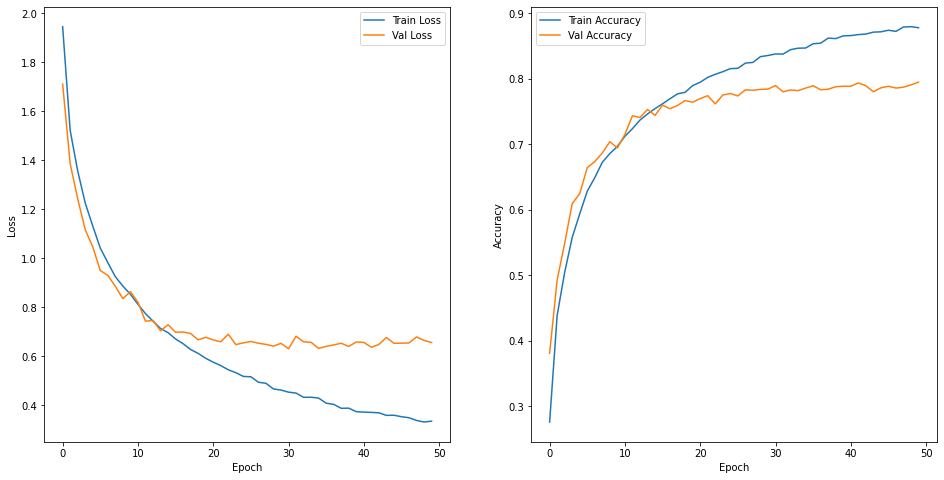

In [14]:
plot_history(history)

In [15]:
# 예측
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_matrix(y_test, y_pred):
  plt.figure(figsize = (10, 8))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
  plt.xlabel('predicted label', fontsize = 15)
  plt.ylabel('true label', fontsize = 15)
  plt.show()

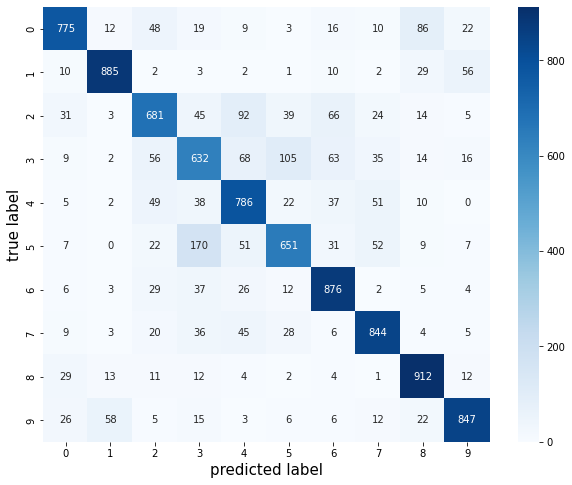

In [17]:
plot_matrix(y_test, y_pred_argmax)

#### callback 함수를 사용하여 정확도를 높인다

In [18]:
# 모델 준비
model = build_model()

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['acc'])

In [20]:
# 콜백 준비
from tensorflow.keras import callbacks

checkpoint_path = 'temp/cifar_10.ckpt'
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, 
 save_weights_only=True, 
 save_best_only=True, 
 monitor='val_loss')

In [21]:
# 모델 학습
EPOCHS = 100
BATCH_SIZE = 256

history = model.fit(X_train, y_train_oh,
 epochs = EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_val, y_val_oh),
 callbacks=[checkpoint])

Epoch 1/100
137/137 [==============================] - 4s 27ms/step - loss: 2.2330 - acc: 0.1576 - val_loss: 2.1081 - val_acc: 0.2253
Epoch 2/100
137/137 [==============================] - 3s 21ms/step - loss: 1.9867 - acc: 0.2648 - val_loss: 1.9771 - val_acc: 0.2593
Epoch 3/100
137/137 [==============================] - 3s 22ms/step - loss: 1.8221 - acc: 0.3378 - val_loss: 1.9453 - val_acc: 0.2758
Epoch 4/100
137/137 [==============================] - 3s 22ms/step - loss: 1.7341 - acc: 0.3717 - val_loss: 1.8117 - val_acc: 0.3383
Epoch 5/100
137/137 [==============================] - 3s 21ms/step - loss: 1.6744 - acc: 0.3895 - val_loss: 1.7305 - val_acc: 0.3795
Epoch 6/100
137/137 [==============================] - 3s 21ms/step - loss: 1.6143 - acc: 0.4134 - val_loss: 1.6842 - val_acc: 0.3989
Epoch 7/100
137/137 [==============================] - 3s 21ms/step - loss: 1.5692 - acc: 0.4286 - val_loss: 1.5748 - val_acc: 0.4434
Epoch 8/100
137/137 [==============================] - 3s 21ms

In [22]:
# 상태 복원
model.load_weights(checkpoint_path)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
  print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
  print('precision: %.3f' % (precision_score(y_test, y_pred, 
    average='macro')))
  print('recall_score: %.3f' % (recall_score(y_test, y_pred, 
    average='macro')))
  print('f1_score: %.3f' % (f1_score(y_test, y_pred, 
    average='macro')))

In [25]:
# 예측
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

print_score(y_test, y_pred_argmax)

313/313 [==============================] - 1s 2ms/step
accuracy: 0.751
precision: 0.749
recall_score: 0.751
f1_score: 0.748


#### 배치 정규화

In [26]:
# 모델 구성
def build_model_bach_normalization():
  model = keras.Sequential()

  model.add(layers.Conv2D(32, 3, padding = 'same', input_shape = 
  (32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))

  model.add(layers.Conv2D(64, 3, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))

  model.add(layers.Conv2D(256, 3, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))

  model.add(layers.Conv2D(256, 3, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))

  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  return model

In [27]:
model = build_model_bach_normalization()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

In [28]:
# 모델 학습
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
 loss = 'categorical_crossentropy',
 metrics=['acc'])

In [29]:
EPOCHS = 100
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
 epochs = EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_val, y_val_oh))

Epoch 1/100
137/137 [==============================] - 5s 25ms/step - loss: 1.5297 - acc: 0.4608 - val_loss: 2.7440 - val_acc: 0.1001
Epoch 2/100
137/137 [==============================] - 3s 23ms/step - loss: 1.1412 - acc: 0.6001 - val_loss: 2.7432 - val_acc: 0.1709
Epoch 3/100
137/137 [==============================] - 3s 22ms/step - loss: 0.9631 - acc: 0.6677 - val_loss: 1.9732 - val_acc: 0.3145
Epoch 4/100
137/137 [==============================] - 3s 24ms/step - loss: 0.8292 - acc: 0.7207 - val_loss: 1.2783 - val_acc: 0.5503
Epoch 5/100
137/137 [==============================] - 3s 24ms/step - loss: 0.7152 - acc: 0.7645 - val_loss: 1.0041 - val_acc: 0.6460
Epoch 6/100
137/137 [==============================] - 3s 22ms/step - loss: 0.6209 - acc: 0.7990 - val_loss: 1.0414 - val_acc: 0.6419
Epoch 7/100
137/137 [==============================] - 3s 22ms/step - loss: 0.5331 - acc: 0.8332 - val_loss: 1.0302 - val_acc: 0.6623
Epoch 8/100
137/137 [==============================] - 3s 24ms

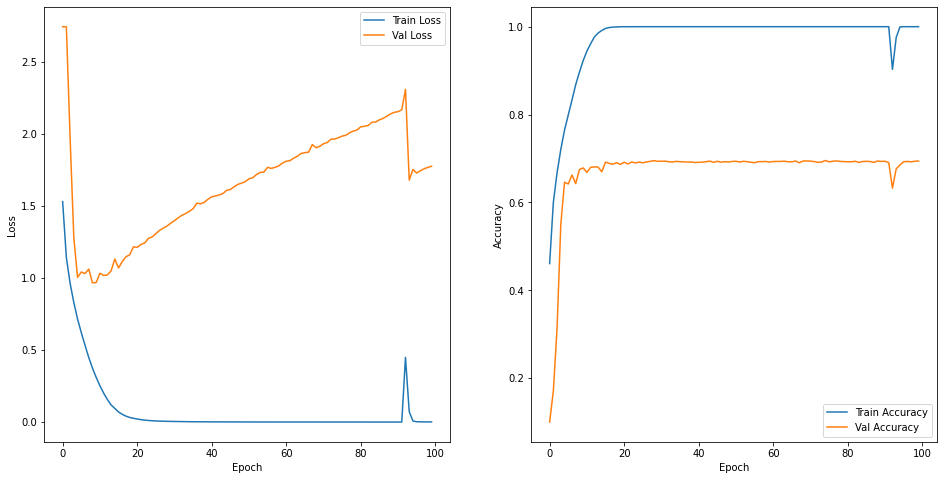

In [30]:
plot_history(history)

In [31]:
loss, acc = model.evaluate(X_test, y_test_oh)
print('loss : ', loss)
print('acc : ', acc)

313/313 [==============================] - 2s 7ms/step - loss: 1.7904 - acc: 0.6921
loss :  1.7903741598129272
acc :  0.6920999884605408
